Phân đoạn ảnh bằng thuật toán Otsu

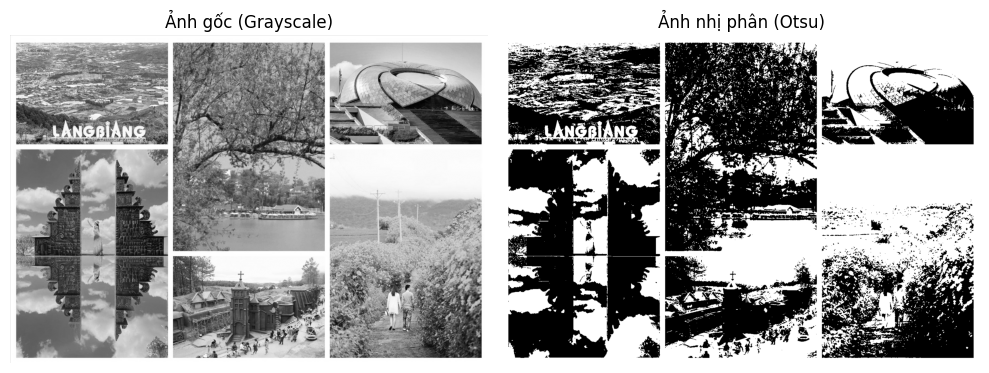

In [2]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
data = Image.open('dalat.jpg').convert('L')

# Chuyển ảnh xám thành mảng numpy
a = np.asarray(data)

# Tính ngưỡng Otsu
thres = threshold_otsu(a)

# Phân ngưỡng ảnh: tạo ảnh nhị phân
binary = a > thres
binary_img = np.uint8(binary * 255)  # nhân 255 để chuyển True/False thành trắng/đen

# Hiển thị ảnh gốc và ảnh nhị phân trong Python
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title("Ảnh gốc (Grayscale)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Ảnh nhị phân (Otsu)")
plt.axis('off')

plt.tight_layout()
plt.show()


Phân đoạn ảnh bằng thuật toán K-means

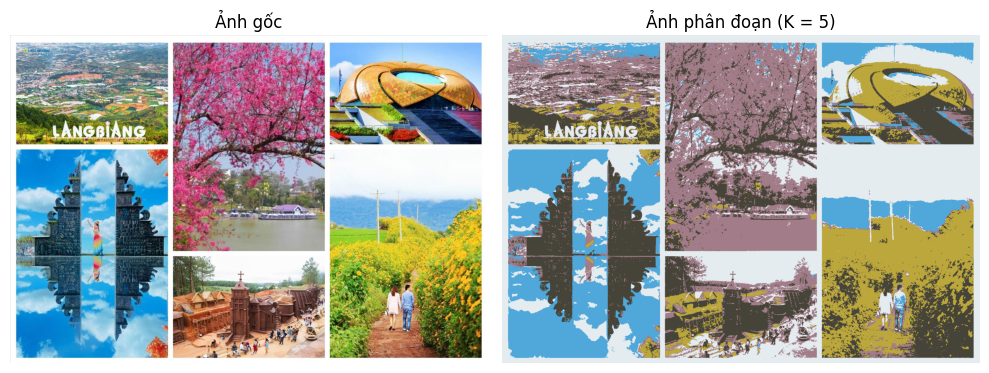

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
image = io.imread('dalat.jpg')  # Thay bằng đường dẫn nếu cần

# Chuyển ảnh từ 3D (H x W x 3) thành 2D (N x 3), mỗi dòng là một pixel RGB
pixels = image.reshape(-1, 3)

# Số cụm muốn phân đoạn
k = 5

# Áp dụng KMeans
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')  # n_init='auto' để tránh cảnh báo
kmeans.fit(pixels)

# Gán nhãn cho từng pixel
labels = kmeans.labels_
segmented_img = kmeans.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)

# Hiển thị ảnh gốc và ảnh phân đoạn trong cùng một cửa sổ Python
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title(f"Ảnh phân đoạn (K = {k})")
plt.axis('off')

plt.tight_layout()
plt.show()
